In [1]:
import os
pth = os.path.abspath(os.path.join(os.getcwd(), '../..'))

                
import sys
sys.path.append(pth)
import src.commons as cmn
from src.exploration import OUNoise
from src.continuous_control.model import Actor, Critic
from src.buffer import MemoryER
from src.continuous_control.agent import DDPGAgent
from src.continuous_control.main import ContinuousControl, DDPG

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:

class Config:
    import os
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 33
    ACTION_SIZE = 4
    NUM_EPISODES = 2000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 512
    
    # Exploration parameter
    NOISE = True
    EPSILON_GREEDY = False
    EPSILON = 1
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    if (NOISE and EPSILON_GREEDY) or (not NOISE and not EPSILON_GREEDY):
        raise ValueError('Only one exploration policy either NOISE or EPSILON_GREEDY si to be chosen ..')
    
    # LEARNING PARAMETERS
    ACTOR_LEARNING_RATE = 0.0001
    CRITIC_LEARNING_RATE = 0.0005
    GAMMA = 0.99  # Discounts
    LEARNING_FREQUENCY = 4
    
    # WEIGHTS UPDATE PARAMENTER
    SOFT_UPDATE = True
    TAU = 0.001  # Soft update parameter for target_network
    SOFT_UPDATE_FREQUENCY = 4
    DECAY_TAU = False
    TAU_DECAY_RATE = 0.003
    TAU_MIN = 0.05
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 1000
    
    if (SOFT_UPDATE and HARD_UPDATE) or (not SOFT_UPDATE and not HARD_UPDATE):
        raise ValueError('Only one of Hard Update and Soft Update is to be chosen ..')
    
    if SOFT_UPDATE_FREQUENCY < LEARNING_FREQUENCY:
        raise ValueError('Soft update frequency can not be smaller than the learning frequency')
    
    # Lambda Functions:
    EXPLORATION_POLICY_FN = lambda: OUNoise(size=Config.ACTION_SIZE, seed=2)
    ACTOR_NETWORK_FN = lambda: Actor(Config.STATE_SIZE, Config.ACTION_SIZE, seed=2, fc1_units=512, fc2_units=256).to(
    device)
    ACTOR_OPTIMIZER_FN = lambda params: torch.optim.Adam(params, lr=Config.ACTOR_LEARNING_RATE)
    
    CRITIC_NETWORK_FN = lambda: Critic(Config.STATE_SIZE, Config.ACTION_SIZE, seed=2, fc1_units=512, fc2_units=256).to(
    device)
    CRITIC_OPTIMIZER_FN = lambda params: torch.optim.Adam(params, lr=Config.CRITIC_LEARNING_RATE)
    
    MEMORY_FN = lambda: MemoryER(Config.BUFFER_SIZE, Config.BATCH_SIZE, seed=2, action_dtype='float')
    
    # USE PATH
    MODEL_NAME = 'model_1'
    model_dir =  pth + '/models'
    base_dir = os.path.join(model_dir, 'continuous_control', '%s' % (MODEL_NAME))
    if not os.path.exists(base_dir):
        print('creating .... ', base_dir)
        os.makedirs(base_dir)
    #
    STATS_JSON_PATH = os.path.join(base_dir, 'stats.json')
    CHECKPOINT_DIR = base_dir


# Run the DDPG Gra
# DDPG.train(
#         env=ContinuousControl(env_type='multi'),
#         agent = DDPGAgent(Config, None),
#         n_episodes=5000, max_t=2000
# )

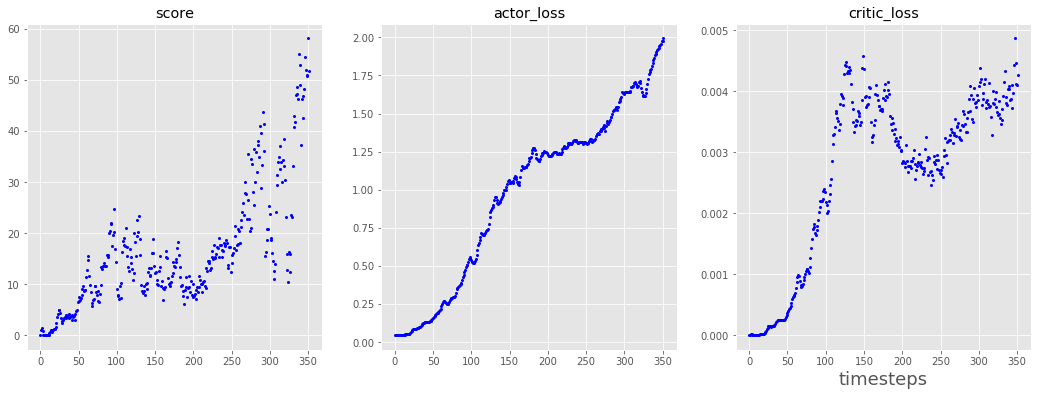

In [5]:
cmn.Plot()(Config.STATS_JSON_PATH, max_cols=3, exclude_plots=['rewards']).show()

In [2]:
class Config:
    import os
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 33
    ACTION_SIZE = 4
    NUM_EPISODES = 2000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 512
    
    # Exploration parameter
    NOISE = True
    EPSILON_GREEDY = False
    EPSILON = 1
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    if (NOISE and EPSILON_GREEDY) or (not NOISE and not EPSILON_GREEDY):
        raise ValueError('Only one exploration policy either NOISE or EPSILON_GREEDY si to be chosen ..')
    
    # LEARNING PARAMETERS
    ACTOR_LEARNING_RATE = 0.0001
    CRITIC_LEARNING_RATE = 0.0005
    GAMMA = 0.99  # Discounts
    LEARNING_FREQUENCY = 4
    
    # WEIGHTS UPDATE PARAMENTER
    SOFT_UPDATE = True
    TAU = 0.001  # Soft update parameter for target_network
    SOFT_UPDATE_FREQUENCY = 4
    DECAY_TAU = False
    TAU_DECAY_RATE = 0.003
    TAU_MIN = 0.05
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 1000
    
    if (SOFT_UPDATE and HARD_UPDATE) or (not SOFT_UPDATE and not HARD_UPDATE):
        raise ValueError('Only one of Hard Update and Soft Update is to be chosen ..')
    
    if SOFT_UPDATE_FREQUENCY < LEARNING_FREQUENCY:
        raise ValueError('Soft update frequency can not be smaller than the learning frequency')
    
    # Lambda Functions:
    EXPLORATION_POLICY_FN = lambda: OUNoise(size=Config.ACTION_SIZE, seed=81)
    ACTOR_NETWORK_FN = lambda: Actor(Config.STATE_SIZE, Config.ACTION_SIZE, seed=712, fc1_units=512, fc2_units=256).to(
    device)
    ACTOR_OPTIMIZER_FN = lambda params: torch.optim.Adam(params, lr=Config.ACTOR_LEARNING_RATE)
    
    CRITIC_NETWORK_FN = lambda: Critic(Config.STATE_SIZE, Config.ACTION_SIZE, seed=453, fc1_units=512, fc2_units=256).to(
    device)
    CRITIC_OPTIMIZER_FN = lambda params: torch.optim.Adam(params, lr=Config.CRITIC_LEARNING_RATE)
    
    MEMORY_FN = lambda: MemoryER(Config.BUFFER_SIZE, Config.BATCH_SIZE, seed=772, action_dtype='float')
    
    # USE PATH
    MODEL_NAME = 'model_3'
    model_dir =  pth + '/models'
    base_dir = os.path.join(model_dir, 'continuous_control', '%s' % (MODEL_NAME))
    if not os.path.exists(base_dir):
        print('creating .... ', base_dir)
        os.makedirs(base_dir)
    #
    STATS_JSON_PATH = os.path.join(base_dir, 'stats.json')
    CHECKPOINT_DIR = base_dir
    
    
    
# # Run the DDPG Gra
DDPG.train(
        env=ContinuousControl(env_type='multi'),
        agent = DDPGAgent(Config, None, mode='train'),
        n_episodes=5000, max_t=2000
)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Fan In values:  512
Fan In values:  256
Fan In values:  512
Fan In values:  256
Fan In values:  512
Fan In values:  256
Fan In values:  512
Fan In values:  256
[INIT] Initializing Ornstein-Uhlenbeck Noise for policy exploration ... ... ...
[INIT] Initializing Experience Replay Buffer .... .... ....
Episode 100	Average Score: 9.05
Episode 200	Average Score: 19.63
Episode 251	Average Score: 30.08
Environment solved in 151 episodes!	Average Score: 30.08


[0.018499999586492778,
 0.15849999645724894,
 0.3304999926127493,
 0.10699999760836362,
 0.14049999685958028,
 0.6319999858736992,
 0.8434999811463058,
 0.32049999283626673,
 0.8899999801069498,
 1.142499974463135,
 1.4574999674223363,
 0.9454999788664281,
 1.1944999733008443,
 0.8844999802298844,
 1.146499974373728,
 1.0544999764300882,
 1.0204999771900476,
 0.9084999796934425,
 1.2349999723955989,
 1.4064999685622752,
 2.3999999463558197,
 2.761999938264489,
 2.4544999451376497,
 2.195999950915575,
 2.575499942433089,
 3.536499920953065,
 4.471499900054186,
 4.794499892834574,
 4.17399990670383,
 4.535999898612499,
 4.280999904312194,
 3.372499924618751,
 3.3364999254234133,
 2.549499943014234,
 3.1229999301955105,
 5.157499884720892,
 4.473499900009483,
 5.6819998729974035,
 5.085499886330217,
 5.246999882720411,
 4.473999899998307,
 5.111999885737896,
 2.459999945014715,
 2.117999952659011,
 1.804999959655106,
 3.3329999255016447,
 3.865499913599342,
 4.5874998974613845,
 5.5719998

In [2]:
class Config:
    import os
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 33
    ACTION_SIZE = 4
    NUM_EPISODES = 2000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 512
    
    # Exploration parameter
    NOISE = True
    EPSILON_GREEDY = False
    EPSILON = 1
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    if (NOISE and EPSILON_GREEDY) or (not NOISE and not EPSILON_GREEDY):
        raise ValueError('Only one exploration policy either NOISE or EPSILON_GREEDY si to be chosen ..')
    
    # LEARNING PARAMETERS
    ACTOR_LEARNING_RATE = 0.0001
    CRITIC_LEARNING_RATE = 0.0005
    GAMMA = 0.99  # Discounts
    LEARNING_FREQUENCY = 4
    
    # WEIGHTS UPDATE PARAMENTER
    SOFT_UPDATE = True
    TAU = 0.001  # Soft update parameter for target_network
    SOFT_UPDATE_FREQUENCY = 4
    DECAY_TAU = False
    TAU_DECAY_RATE = 0.003
    TAU_MIN = 0.05
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 1000
    
    if (SOFT_UPDATE and HARD_UPDATE) or (not SOFT_UPDATE and not HARD_UPDATE):
        raise ValueError('Only one of Hard Update and Soft Update is to be chosen ..')
    
    if SOFT_UPDATE_FREQUENCY < LEARNING_FREQUENCY:
        raise ValueError('Soft update frequency can not be smaller than the learning frequency')
    
    # Lambda Functions:
    EXPLORATION_POLICY_FN = lambda: OUNoise(size=Config.ACTION_SIZE, seed=81)
    ACTOR_NETWORK_FN = lambda: Actor(Config.STATE_SIZE, Config.ACTION_SIZE, seed=712, fc1_units=512, fc2_units=256).to(
    device)
    ACTOR_OPTIMIZER_FN = lambda params: torch.optim.Adam(params, lr=Config.ACTOR_LEARNING_RATE)
    
    CRITIC_NETWORK_FN = lambda: Critic(Config.STATE_SIZE, Config.ACTION_SIZE, seed=453, fc1_units=512, fc2_units=256).to(
    device)
    CRITIC_OPTIMIZER_FN = lambda params: torch.optim.Adam(params, lr=Config.CRITIC_LEARNING_RATE)
    
    MEMORY_FN = lambda: MemoryER(Config.BUFFER_SIZE, Config.BATCH_SIZE, seed=772, action_dtype='float')
    
    # USE PATH
    MODEL_NAME = 'model_4'
    model_dir =  pth + '/models'
    base_dir = os.path.join(model_dir, 'continuous_control', '%s' % (MODEL_NAME))
    if not os.path.exists(base_dir):
        print('creating .... ', base_dir)
        os.makedirs(base_dir)
    #
    STATS_JSON_PATH = os.path.join(base_dir, 'stats.json')
    CHECKPOINT_DIR = base_dir
    
    
    
# # Run the DDPG Gra
_ = DDPG.train(
        env=ContinuousControl(env_type='multi'),
        agent = DDPGAgent(Config, None, mode='train'),
        n_episodes=5000, max_t=2000
)

creating ....  /Users/sam/All-Program/App/DeepRL/models/continuous_control/model_4


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Ornstein-Uhlenbeck Noise for policy exploration ... ... ...
[INIT] Initializing Experience Replay Buffer .... .... ....
Episode 100	Average Score: 4.99
Episode 200	Average Score: 19.69
Episode 300	Average Score: 19.75
Episode 349	Average Score: 30.03
Environment solved in 249 episodes!	Average Score: 30.03


## Test the model

In [2]:
class Config:
    STATE_SIZE = 33
    ACTION_SIZE = 4
    ACTOR_CHECKPOINT_PATH = pth + '/models/continuous_control/model_4/actor_local_100.pth'
    CRITIC_CHECKPOINT_PATH = pth + '/models/continuous_control/model_4/critic_local_100.pth'
    EXPLORATION_POLICY_FN = lambda: OUNoise(size=Config.ACTION_SIZE, seed=224)
    ACTOR_NETWORK_FN = lambda: Actor(Config.STATE_SIZE, Config.ACTION_SIZE, seed=481, fc1_units=512, fc2_units=256).to(device)           
    CRITIC_NETWORK_FN = lambda: Critic(Config.STATE_SIZE, Config.ACTION_SIZE, seed=982, fc1_units=512, fc2_units=256).to(device)

#     state_size, action_size, seed, fc1_units=512, fc2_units=256
# Run the DDPG Gra
DDPG.test(
        env=ContinuousControl(env_type='multi', mode='test'),
        agent = DDPGAgent(Config, None, mode='test'),
        trials=30, steps=5000
)

[Mode] Setting to Test Mode


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[Agent] Loading Actor/Critic weights
[Actor] Initializing the Actor network ..... 
[Actor] Initializing the Critic network ..... 
[INIT] Initializing Ornstein-Uhlenbeck Noise for policy exploration ... ... ...
[Agent] Actor weights loaded from:  /Users/sam/All-Program/App/DeepRL/models/continuous_control/model_4/actor_local_100.pth
[Agent] Critic weights loaded from:  /Users/sam/All-Program/App/DeepRL/models/continuous_control/model_4/critic_local_100.pth
Starting Testing ...
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Current Reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] Total Reward: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Done.
Starting Testing ...
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Current Reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

## Plot Network Diagram:
-------

In [3]:
import torch
# input_size = (1,3,4,84,84)
actor_nn = Config.ACTOR_NETWORK_FN()
x = torch.rand(size=(20, 33))
y = actor_nn(x)
params = dict(actor_nn.named_parameters())

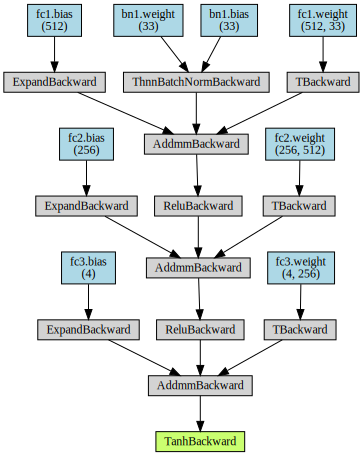

In [5]:
from IPython.core.display import display, HTML
from torchviz import make_dot
display(HTML("<style>.container { width:100% !important; }</style>"))

make_dot(y, params = params)

In [3]:
import torch
import numpy as np
# input_size = (1,3,4,84,84)
critic_nn = Config.CRITIC_NETWORK_FN()
x = torch.rand(size=(20, 33))
y = critic_nn(x, torch.randn(20,4))
params = dict(critic_nn.named_parameters())

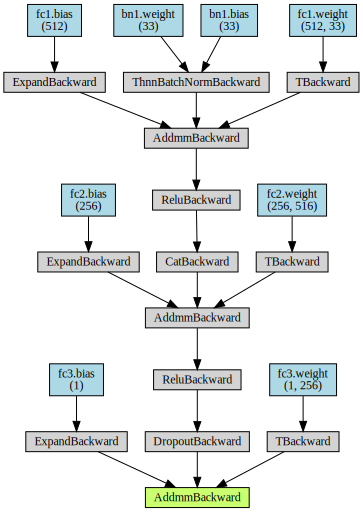

In [4]:
from IPython.core.display import display, HTML
from torchviz import make_dot
display(HTML("<style>.container { width:100% !important; }</style>"))

make_dot(y, params = params)